# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

In [122]:
import numpy as np
import matplotlib.pyplot as plt


In [123]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
airlines_df=pd.read_csv('/content/drive/MyDrive/airlines_hw/airlines.csv')
airports_df=pd.read_csv('/content/drive/MyDrive/airlines_hw/airports.csv')
flights_df=pd.read_csv('/content/drive/MyDrive/airlines_hw/flights.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-123-fef1b33dbe9e>:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df=pd.read_csv('/content/drive/MyDrive/airlines_hw/flights.csv')


Исключим записи с ошибками или отсутствующими важными данными.

In [124]:
print(flights_df.info())
flights_df=flights_df[(flights_df['AIRLINE'].isin(airlines_df['IATA_CODE'])) & (flights_df['ORIGIN_AIRPORT'].isin(airports_df['IATA_CODE'])
                                                                             & (flights_df['DESTINATION_AIRPORT'].isin(airports_df['IATA_CODE'])))
                                                                             & (~flights_df.iloc[:, 0:12].isna().any(axis=1))
                                                                             & (~flights_df.iloc[:, 20:23].isna().any(axis=1))].reset_index(drop=True)
print(flights_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

Как видим, беcполезных записей оказалось 587949. Стоит уделить внимание ведению диспетчерских записей для предотвращения сбоев из-за неточного расписания.

In [125]:
5819079-5231130

587949

In [126]:
print(airlines_df.isna().any(), airports_df.isna().any())

IATA_CODE    False
AIRLINE      False
dtype: bool IATA_CODE    False
AIRPORT      False
CITY         False
STATE        False
COUNTRY      False
LATITUDE      True
LONGITUDE     True
dtype: bool


Не указана долгота и широта некоторых аэропортов.

Посмотрим, в какие дни недели перелетов больше.

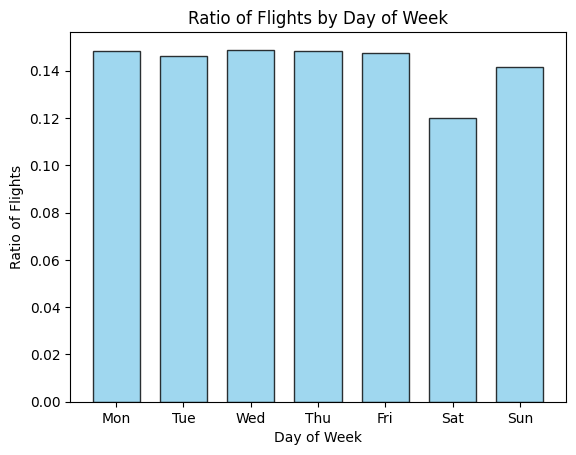

In [127]:
import matplotlib.pyplot as plt

days_count=flights_df['DAY_OF_WEEK'].value_counts().sort_index()
plt.bar(days_count.index, days_count.values/days_count.values.sum(),
    color='skyblue',
    edgecolor='black',
    linewidth=1.,
    alpha=0.8,
    width=0.7
)
plt.xticks(days_count.index,['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.xlabel('Day of Week')
plt.ylabel('Ratio of Flights')
plt.title('Ratio of Flights by Day of Week')
plt.show()

Чаще всего полеты в рабочие дни, реже всего - по по выходным, меньше всего в субботу.

Выделим топ-7 авиакомпаний с наибольшим количеством задержек.

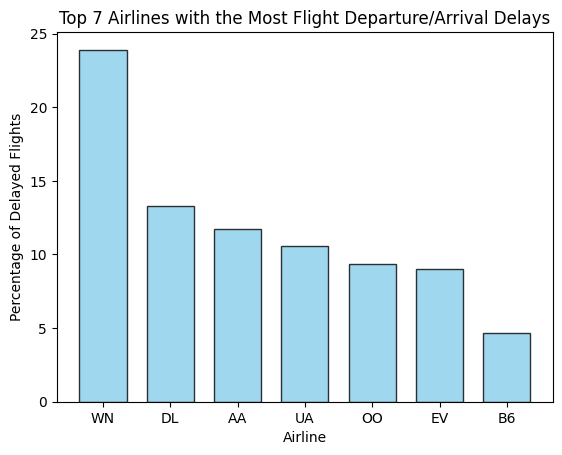

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,B6,JetBlue Airways
3,OO,Skywest Airlines Inc.
4,WN,Southwest Airlines Co.
5,DL,Delta Air Lines Inc.
6,EV,Atlantic Southeast Airlines


In [128]:
delayed_df=flights_df[(flights_df['DEPARTURE_DELAY']>0) | (flights_df['ARRIVAL_DELAY']>0)].reset_index(drop=True)
airline_delay_counts=delayed_df['AIRLINE'].value_counts()
airline_delay_ratio=airline_delay_counts/airline_delay_counts.sum()
airline_delay_ratio=airline_delay_ratio[:7]

plt.bar(airline_delay_ratio.index,airline_delay_ratio*100,
    color='skyblue',
    edgecolor='black',
    linewidth=1.,
    alpha=0.8,
    width=0.7
)
plt.xlabel('Airline')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Top 7 Airlines with the Most Flight Departure/Arrival Delays')
plt.show()

airlines_df[airlines_df['IATA_CODE'].isin(airline_delay_ratio.index)].reset_index(drop=True)

Авиакомпания Southwest Airlines Co. (WN) имеет наибольший процент задержек.

Теперь топ-7 аэропортов с наибольшим количеством задержек.

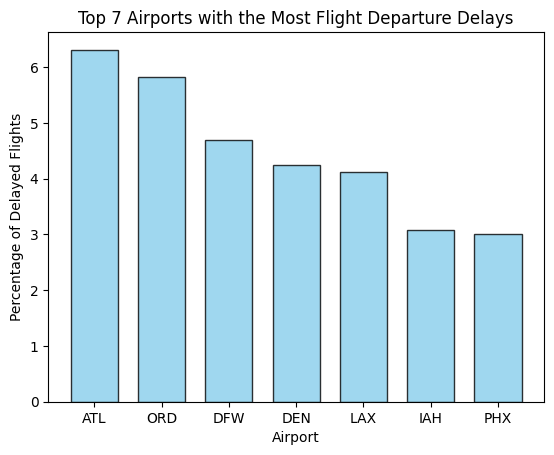

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
1,DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
2,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
3,IAH,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
4,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
6,PHX,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806


In [129]:
airport_delay_counts=delayed_df['ORIGIN_AIRPORT'].value_counts()
airport_delay_ratio=airport_delay_counts/airport_delay_counts.sum()
airport_delay_ratio=airport_delay_ratio[:7]

plt.bar(airport_delay_ratio.index,airport_delay_ratio*100,
    color='skyblue',
    edgecolor='black',
    linewidth=1.,
    alpha=0.8,
    width=0.7
)
plt.xlabel('Airport')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Top 7 Airports with the Most Flight Departure Delays')
plt.show()

airports_df[airports_df['IATA_CODE'].isin(airport_delay_ratio.index)].reset_index(drop=True)

Больше всего процент задержек в Hartsfield-Jackson Atlanta International Airport (ATL).

In [130]:
delayed_df['WEATHER_DELAY'].notna().sum()/delayed_df.shape[0]

0.4011698922667562

40% задержек происходят из-за погоды. Разберемся в этом подробнее.

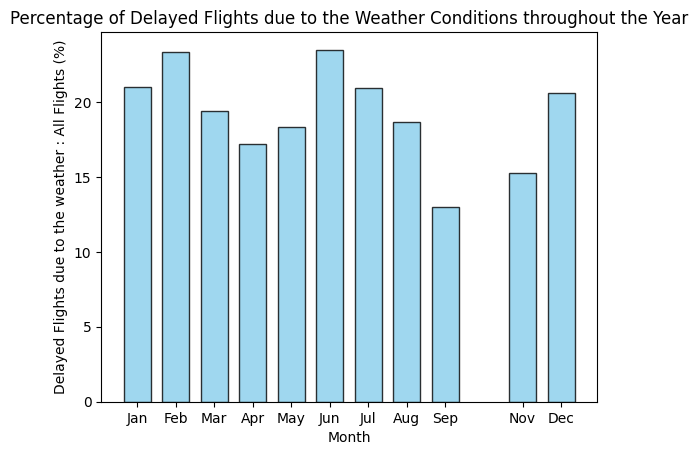

Empty DataFrame
Columns: [YEAR, MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY, DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY]
Index: []

[0 rows x 31 columns]


In [131]:
weather_delayed=delayed_df[delayed_df['WEATHER_DELAY'].notna()]
month_delay_counts=weather_delayed['MONTH'].value_counts()
month_counts=flights_df['MONTH'].value_counts()
month_delay_ratio=month_delay_counts/month_counts

plt.bar(month_delay_ratio.index,month_delay_ratio*100,
    color='skyblue',
    edgecolor='black',
    linewidth=1.,
    alpha=0.8,
    width=0.7
)
plt.xlabel('Month')
plt.ylabel('Delayed Flights due to the weather : All Flights (%)')
plt.title('Percentage of Delayed Flights due to the Weather Conditions throughout the Year')
plt.xticks(month_delay_ratio.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov', 'Dec'])
plt.show()

print(flights_df[flights_df['MONTH']==10])

Наибольшая задержка из-за погоды происходит зимой и летом, особенно в феврале и июне. Заметим, что данные по перелетам в октябре отсутствуют в изначальном датасете.

Найдем самые "опаздывающие" борты.

In [132]:
delayed_tails=delayed_df['TAIL_NUMBER'].value_counts()
delayed_tails=delayed_tails[delayed_tails>delayed_tails.median()]
delayed_tails[:10]

,count
TAIL_NUMBER,
N489HA,1435
N488HA,1354
N484HA,1347
N486HA,1338
N480HA,1328
N493HA,1322
N483HA,1297
N481HA,1287
N491HA,1261


In [133]:
del_tails=delayed_df[delayed_df['TAIL_NUMBER'].isin(delayed_tails[:9].index)]
del_tails['AIRLINE'].unique()

array(['HA'], dtype=object)

In [134]:
airlines_df[airlines_df['IATA_CODE']=='HA']

,IATA_CODE,AIRLINE
11,HA,Hawaiian Airlines Inc.


In [135]:
d=flights_df[flights_df['AIRLINE']=='HA']
d['ORIGIN_AIRPORT'].value_counts()[:5]

,count
ORIGIN_AIRPORT,
HNL,30130
OGG,12831
LIH,7283
KOA,7279
ITO,5452


In [136]:
d['DESTINATION_AIRPORT'].value_counts()[:5]

,count
DESTINATION_AIRPORT,
HNL,30096
OGG,12843
LIH,7291
KOA,7288
ITO,5453


In [137]:
airports_df[airports_df['IATA_CODE']=='HNL']

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
141,HNL,Honolulu International Airport,Honolulu,HI,USA,21.31869,-157.92241


Заметим, что самые опаздывающие самолеты (весь топ-9) относятся к модели N4**HA. Эти борты принадлежат Hawaiian Airlines Inc. Возможно, стоит проверить техническое состояние самолетов или повысить эффективность аэропорта Honolulu International Airport (HNL) - самый частый аэропорт вылета/прилета этой авиакомпании.

In [138]:
!pip install basemap

В каких аэропортах происходит задержка из-за погоды?

In [139]:
w_df=delayed_df[delayed_df['WEATHER_DELAY'].notna()]
weather_cond=w_df['ORIGIN_AIRPORT'].value_counts() #аэропорты, в которых были задержки вылета ИЗ-ЗА ПОГОДЫ, по убыванию числа погодных задержек

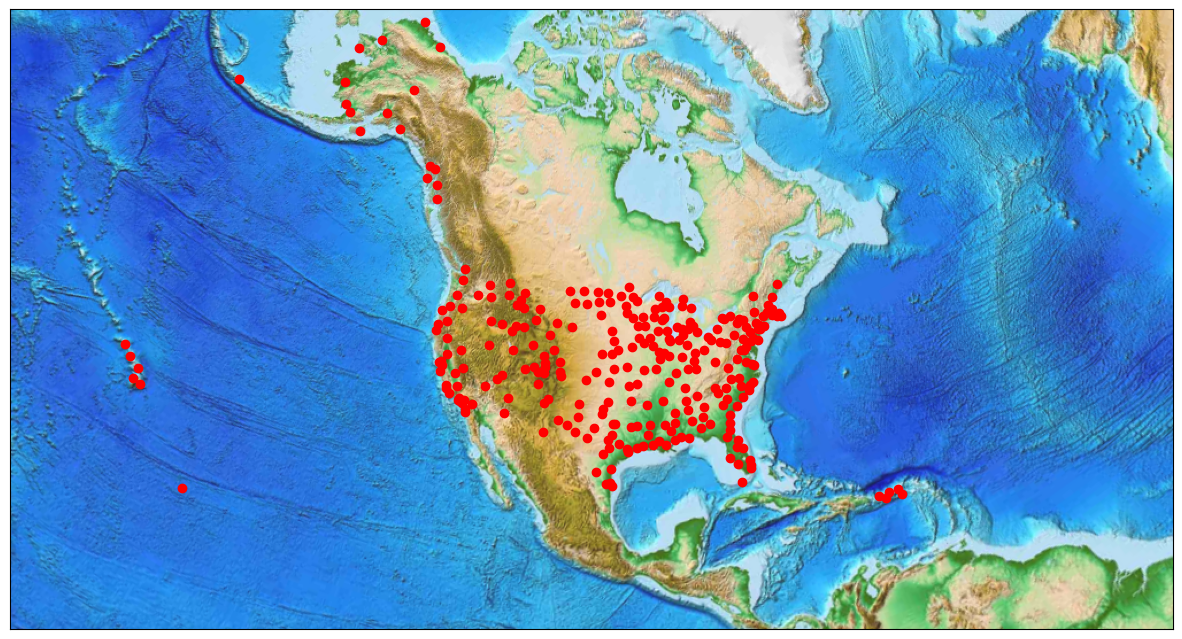

In [140]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

w_cond=airports_df[airports_df['IATA_CODE'].isin(weather_cond.index)]
fig = plt.figure(figsize=(15, 10))
land = Basemap(projection='lcc', resolution=None,
               width=15E6, height=8E6,
               lat_0=45, lon_0=-100,)
land.etopo(scale=0.5, alpha=0.9)

weather_xy=np.array(land(w_cond['LONGITUDE'], w_cond['LATITUDE'])).T

for a in weather_xy[:300]:
        plt.plot(a[0], a[1], marker='o',color='red')
plt.show()

Заметим, что задержка рейса из-за погоды часто наблюдается в аэропортах, расположенных на побережье, где погода действительно бывает менее стабильной.